In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vtk_rw import read_vtk
import seaborn as sns

/home/raid3/huntenburg/workspace/anaconda2/envs/myelinconnect/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### calculated from mesh

https://sites.google.com/site/dlampetest/python/calculating-normals-of-a-triangle-mesh-using-numpy

In [3]:
def calc_normals(vertices, faces):
    
    triangles = vertices[faces]
    face_normals = np.cross( triangles[::,1 ] - triangles[::,0]  , triangles[::,2 ] - triangles[::,0] )
    #face_normals /= np.linalg.norm(face_normals, axis=1)[:,np.newaxis]
    face_normals /= 2 # weighting by surface area of the triangle, which is half the length of the normal
    
    vertex_normals = np.zeros(vertices.shape, dtype=vertices.dtype )
    vertex_normals[faces[:,0]] += face_normals
    vertex_normals[faces[:,1]] += face_normals
    vertex_normals[faces[:,2]] += face_normals
    vertex_normals /= np.linalg.norm(vertex_normals, axis=1)[:,np.newaxis]
    
    return vertex_normals

### from meshlab in object file

In [13]:
def read_obj(obj_file):
    obj_df=pd.read_csv(obj_file, header=None, engine='python', comment='#', sep=' ')
    obj_df=obj_df.dropna()

    vertex_df = obj_df.loc[np.where(obj_df[0] == 'v')[0]][[1,2,3]]
    vertex_array = np.asarray(vertex_df, dtype='float')

    if 'vn' in list(obj_df[0]):
        normals_df = obj_df.loc[np.where(obj_df[0] == 'vn')[0]][[1,2,3]]
        normals_array = np.asarray(normals_df, dtype='float')
    else:
        normals_array = np.empty(0)

    faces_df = obj_df.loc[np.where(obj_df[0] == 'f')[0]][[1,2,3]]
    faces_array = np.asarray(faces_df).copy()
    for i in range(faces_array.shape[0]):
        for j in range(faces_array.shape[1]):
            faces_array[i][j]=int(faces_array[i][j].split('//')[0])
    faces_array = np.asarray(faces_array, dtype='int64')-1
    
    return vertex_array, faces_array, normals_array

### comparing normals

In [5]:
def compare_normals(normals_a, normals_b):
    diff_rad = np.zeros((normals_a.shape[0],))
    for i in range(normals_a.shape[0]):
        diff_rad[i] = np.arccos(np.dot(normals_a[i], normals_b[i]))
    
    diff_deg = diff_rad  * (180/np.pi)
    return diff_rad, diff_deg

In [14]:
simple_v, simple_f, obj_simple_normals = read_obj('/scr/ilz3/myelinconnect/groupavg/indv_space/BP4T/lowres_rh_d_def.obj')

In [15]:
calc_simple_normals = calc_normals(simple_v, simple_f)

In [16]:
complex_v, complex_f, obj_complex_normals = read_obj('/scr/ilz3/myelinconnect/struct/surf_rh/orig/mid_surface/BP4T_rh_mid.obj')

In [17]:
calc_complex_normals = calc_normals(complex_v, complex_f)

In [18]:
mapping = np.load('/scr/ilz3/myelinconnect/all_data_on_simple_surf/seeds/BP4T_rh_highres2lowres_seeds.npy')

In [19]:
obj_diff_rad, obj_diff_deg = compare_normals(obj_simple_normals, obj_complex_normals[mapping])

In [20]:
calc_diff_rad, calc_diff_deg = compare_normals(calc_simple_normals, calc_complex_normals[mapping])

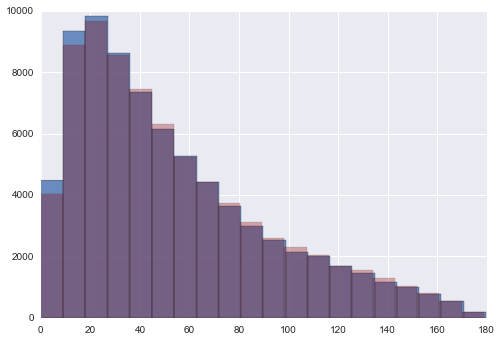

In [27]:
plt.hist(np.nan_to_num(obj_diff_deg), bins=20, alpha=0.8);
plt.hist(np.nan_to_num(calc_diff_deg), bins=20, alpha=0.3, color='darkred');

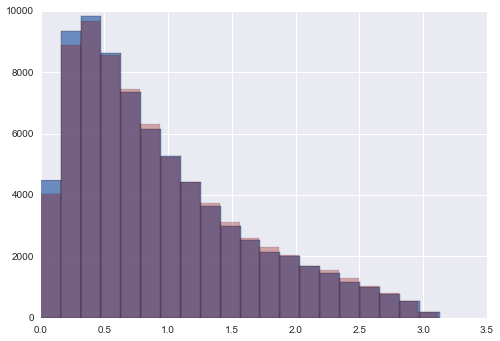

In [28]:
plt.hist(np.nan_to_num(obj_diff_rad), bins=20, alpha=0.8);
plt.hist(np.nan_to_num(calc_diff_rad), bins=20, alpha=0.3, color='darkred');

In [29]:
simple_calc_vs_obj_rad, simple_calc_vs_obj_deg = compare_normals(obj_simple_normals, calc_simple_normals)

In [30]:
complex_calc_vs_obj_rad, complex_calc_vs_obj_deg = compare_normals(obj_complex_normals, calc_complex_normals)

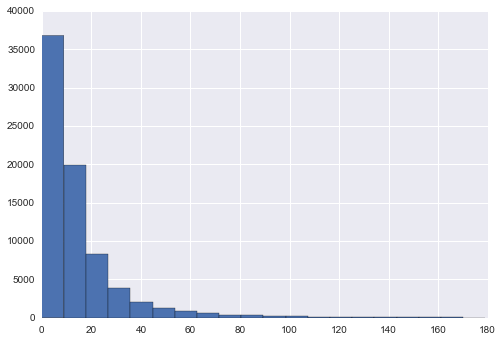

In [35]:
plt.hist(np.nan_to_num(simple_calc_vs_obj_deg), bins=20);

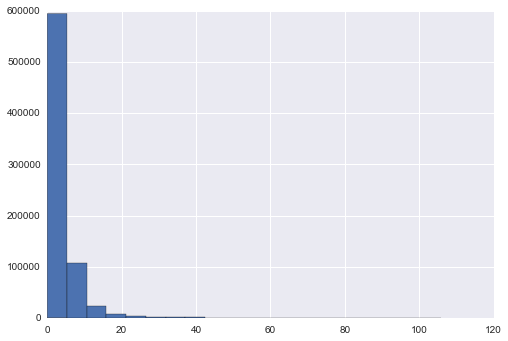

In [34]:
plt.hist(np.nan_to_num(complex_calc_vs_obj_deg), bins=20);

In [45]:
np.where(np.isnan(calc_diff_rad))[0].shape

(0,)